# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# Comparison of LDA and PCA 2D Projection of a Classification Dataset


As we have seen in the lecture, Principal Component Analysis (PCA) applied to data identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the data. 

Linear Discriminant Analysis (LDA) tries to identify attributes that account for the most variance between classes. In particular, LDA, in contrast to PCA, is a supervised method, using known class labels.

The dataset we are going to use in this exercise is the famous Iris data set. Some additional information about the Iris dataset is available at:

https://archive.ics.uci.edu/ml/datasets/iris

The Iris dataset represents 3 kind of Iris flowers (Setosa, Versicolour and Virginica) with 4 attributes: sepal length, sepal width, petal length and petal width.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np

# Load the Data

Load the Iris dataset. Create the features and target variables. Get the target names. Consider creating a pandas dateframe for your convenience.

In [44]:
iris = load_iris()
target_names=iris.target_names

## Preprocessing
Divide the dataset into a feature set and corresponding labels.

In [45]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df["target"] = df["target"].astype(int)
df["target"] = df["target"].map({0:target_names[0], 1:target_names[1], 2:target_names[2]})
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
102,7.1,3.0,5.9,2.1,virginica
9,4.9,3.1,1.5,0.1,setosa
41,4.5,2.3,1.3,0.3,setosa
73,6.1,2.8,4.7,1.2,versicolor
127,6.1,3.0,4.9,1.8,virginica


Divide the data into training (70%) and test (30%) sets.

In [46]:
X = df.drop('target', axis=1)
y = df['target']

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 3)

In [49]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [50]:
y_train.shape, y_test.shape

((105,), (45,))

# Scaling

PCA performs best with a normalized feature set. Perform a standard normalization to normalize our feature set. To do this, use the `StandardScaler` from `sklearn.preprocessing`.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler = StandardScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

In [54]:
X_test = scaler.transform(X_test)

# PCA & LDA

Now, it is really a matter of few lines of code to perform PCA and LDA using Python's Scikit-Learn library. As mentioned before, PCA depends only upon the feature set and not the label data, whichs makes PCA to be considered as an unsupervised machine learning technique.

Performing PCA using Scikit-Learn is a two-step process:

1. Initialize the PCA class by passing the number of components to the constructor. Do not specify the number of components in the constructor to be the number of features. Hence, all four of the features in the feature set will be returned for both the training and test sets.
2. Call the fit and then transform methods by passing the feature set to these methods. The transform method returns the specified number of principal components.

Repeat the previous steps for LDA. Note for LDA, that `n_components` cannot be larger than `min(n_features, n_classes - 1)`. So, the default for LDA will be `3-1=2` components.

In [55]:
n_features = X_train.shape[1]
n_features

4

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA()

In [58]:
X_pca_train = pca.fit_transform(X_train)

In [59]:
X_pca_test = pca.transform(X_test)

In [60]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [61]:
lda = LinearDiscriminantAnalysis()

In [62]:
X_lda_train = lda.fit_transform(X=X_train, y=y_train)
X_lda_test = lda.transform(X_test)

The PCA and LDA classes contain the attribute `explained_variance_ratio_` which returns the variance caused by each of the principal components. Show the "explained variance ratio" for each class. What do you observe?

Note: the `explained_variance_ratio_` has a shape of `(n_components,)`.

In [63]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca.round(2)

array([0.72, 0.23, 0.04, 0.  ])

In [64]:
pca.components_

array([[ 0.5196075 , -0.26285367,  0.58445384,  0.56509264],
       [ 0.37709405,  0.92420964,  0.02960444,  0.05253753],
       [ 0.71321512, -0.25045982, -0.12547617, -0.64253389],
       [-0.28130467,  0.11838227,  0.80111985, -0.51484008]])

In [65]:
exp_var_lda = lda.explained_variance_ratio_
exp_var_lda.round(2)

array([0.99, 0.01])

**Observation:** in the "solutions" notebook.

Plot the variance against principal components for PCA and LDA.

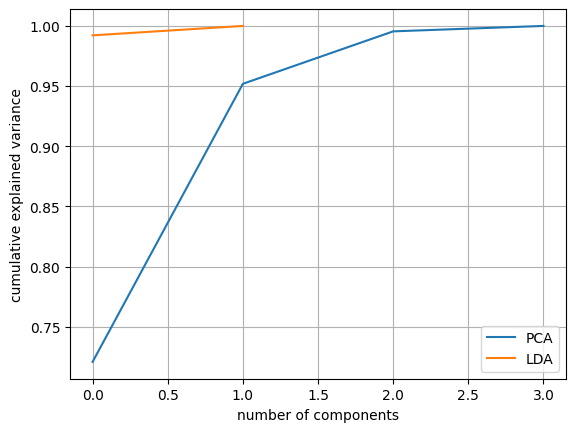

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), label="PCA")
plt.plot(np.cumsum(lda.explained_variance_ratio_), label="LDA")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.legend()
plt.grid();

Plot the test samples on the 2 first principal components.

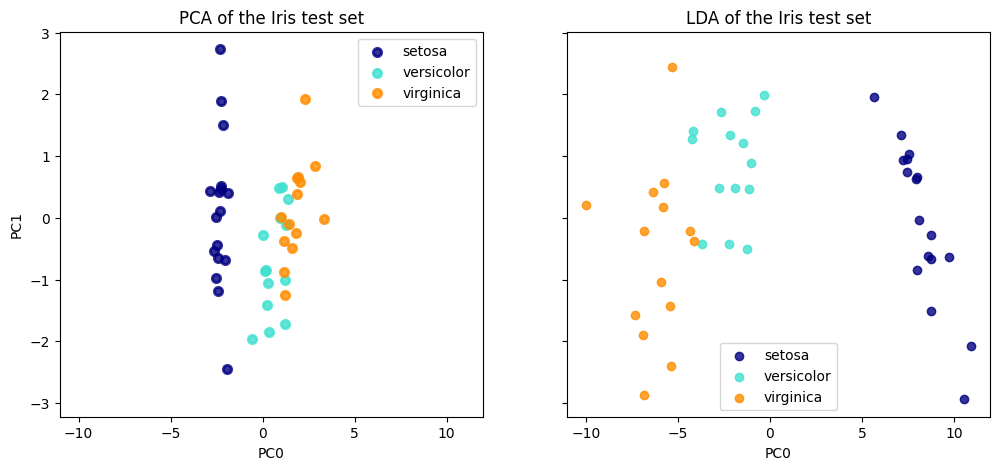

In [67]:
_, (pca_ax, kpca_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 5))

colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    pca_ax.scatter(
        X_pca_test[y_test == target_name, 0], 
        X_pca_test[y_test == target_name, 1], 
        color=color, 
        alpha=0.8, 
        lw=lw, 
        label=target_name
    )
pca_ax.legend(loc="best", shadow=False, scatterpoints=1)
pca_ax.set_title("PCA of the Iris test set")
pca_ax.set_ylabel("PC1")
pca_ax.set_xlabel("PC0")

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    kpca_ax.scatter(
        X_lda_test[y_test == target_name, 0], 
        X_lda_test[y_test == target_name, 1], 
        alpha=0.8, 
        color=color, 
        label=target_name
    )
kpca_ax.legend(loc="best", shadow=False, scatterpoints=1)
kpca_ax.set_title("LDA of the Iris test set")
kpca_ax.set_xlabel("PC0");

# Train a Classifier

Use a Random Forest classification (max depth = 3) for making the predictions. 
Use the PCA- and LDA-projected data for training and testing.
Report the model's accuracy on the test set. Record your result in a dictionary for a later usage (we will compare all findings in the same bar plot).

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_pca_train, y_train)

# Predicting the Test set results
y_pca_test_pred = classifier.predict(X_pca_test)

In [70]:
round(accuracy_score(y_test, y_pca_test_pred),2)

0.91

In [71]:
records = {"PCA - 4 comp (default)": accuracy_score(y_test, y_pca_test_pred)}

In [72]:
# RF for LDA projections
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_lda_train, y_train)

# Predicting the Test set results
y_lda_test_pred = classifier.predict(X_lda_test)

In [73]:
round(accuracy_score(y_test, y_lda_test_pred),2)

0.98

In [74]:
records["LDA - 3 comp (default)"] = accuracy_score(y_test, y_lda_test_pred)

# Non-default PCA & LDA

Let's now try to use:
- 1, 2 and 3 principal components for PCA
- 1 principal components for LDA
to train our algorithms.
Use again Random Forest classification (max depth = 3) for making the predictions. 
Use the PCA- and LDA-projected data for training and testing.
Report the model's accuracy on the test set. Record your result in a dictionary for a later usage (we will compare all findings in the same bar plot).

In [75]:
# PCA 1
pca = PCA(n_components=1)
# fit & tranform
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [76]:
# RF for PCA projections
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_pca_train, y_train)

# Predicting the Test set results
y_pca_test_pred = classifier.predict(X_pca_test)

records["PCA - 1 comp"] = accuracy_score(y_test, y_pca_test_pred)

In [77]:
# PCA 2
pca = PCA(n_components=2)
# fit & tranform
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [78]:
# RF for PCA projections
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_pca_train, y_train)

# Predicting the Test set results
y_pca_test_pred = classifier.predict(X_pca_test)

records["PCA - 2 comp"] = accuracy_score(y_test, y_pca_test_pred)

In [79]:
# PCA 3
pca = PCA(n_components=3)
# fit & tranform
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

In [80]:
# RF for PCA projections
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_pca_train, y_train)

# Predicting the Test set results
y_pca_test_pred = classifier.predict(X_pca_test)

records["PCA - 3 comp"] = accuracy_score(y_test, y_pca_test_pred)

In [81]:
# LDA - 1
lda = LinearDiscriminantAnalysis(n_components=1)
# fit & tranform
X_lda_train = lda.fit_transform(X=X_train, y=y_train)
X_lda_test = lda.transform(X_test)

In [82]:
# RF for LDA projections
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_lda_train, y_train)

# Predicting the Test set results
y_lda_test_pred = classifier.predict(X_lda_test)

records["LDA - 1 comp"] = accuracy_score(y_test, y_lda_test_pred)

# Original data

Let's now try to use the original, unprojected dataset to train and test our algorithm.
Use again Random Forest classification (max depth = 3) for making the predictions. 
Report the model's accuracy on the test set. Record your result in a dictionary for a later usage (we will compare all findings in the same bar plot).

In [83]:
# RF for raw data
classifier = RandomForestClassifier(max_depth=3, random_state=3)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_test_pred = classifier.predict(X_test)

records["Original data"] = accuracy_score(y_test, y_test_pred)

# Plot the model accuracy scores

Create a bar plot with all model accuracies. Discuss the results.

In [84]:
import seaborn as sns

C:\Users\batvi\AppData\Local\Temp\ipykernel_30848\2817845725.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(records.keys()), y=list(records.values()), palette="Blues", ax=ax)


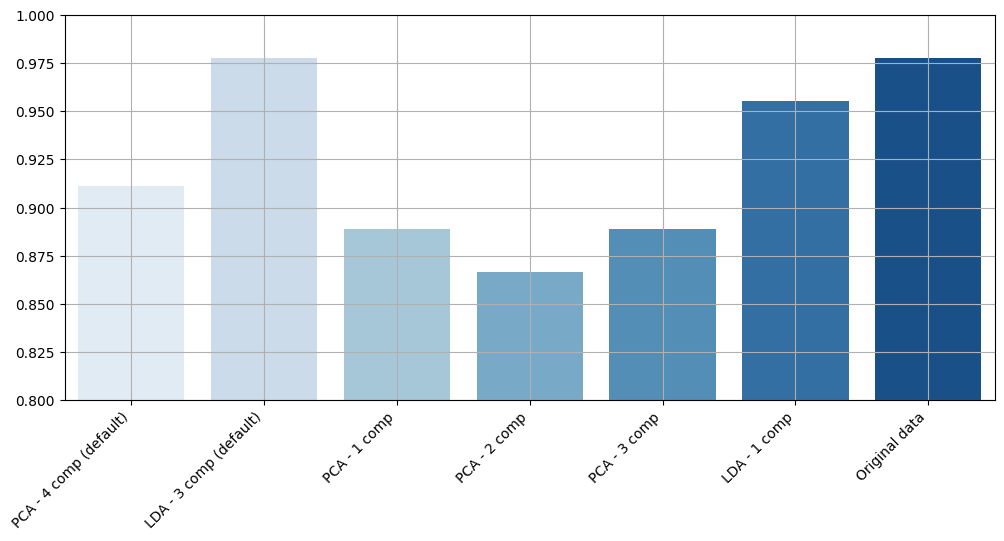

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=list(records.keys()), y=list(records.values()), palette="Blues", ax=ax)
plt.xticks(rotation=45, ha='right')
ax.set_ylim([0.8, 1])
plt.grid();

**Discussion**: From the above experimentation we could achieve optimal level of accuracy while making it possible to significantly reduce the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is very close to the accuracy achieved with will feature set, i.e. $\sim 97\%$. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components. For example, from the PCA results we can see that the accuracy achieved with one principal component ($\sim 88\%$) was greater than the one achieved with two principal components ($\sim 86\%$). When comparing PCA and LDA, and assuming the number of components is the same, we observe that the latter does overall a better job.

The number of principal components to retain in a feature set depends on several conditions. In some datasets, all the features can be contributing equally to the overall variance, therefore all the principal components are crucial to the predictions and none can be ignored. A general rule of thumb is to take number of principal of principal components that contribute to significant variance (via the explained variance ratio) and ignore those with diminishing variance returns. A good way is to plot the variance against principal components (scree plot) and ignore the principal components with diminishing values.